In [10]:

import pandas as pd
import os

%matplotlib inline

#user specify instrument and contract month

product=''
month=''

while True:
    inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
    if inst==1:
        product='Brent'
        break
    elif inst==2:
        product='Gasoil'
        break   
    elif inst==3:
        product='HO'
        break      
    elif inst==4:
        product='RBOB'
        break       
    elif inst==5:
        product='WTI'
        break       
    else:
        print 'You did not input a correct number. Please try again.'

while True:
    Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
    if Mth==1:
        month='Jan'
        break
    elif Mth==2:
        month='Feb'
        break   
    elif Mth==3:
        month='Mar'
        break   
    elif Mth==4:
        month='Apr'
        break   
    elif Mth==5:
        month='May'
        break          
    elif Mth==6:
        month='Jun'
        break   
    elif Mth==7:
        month='Jul'
        break   
    elif Mth==8:
        month='Aug'
        break   
    elif Mth==9:
        month='Sep'
        break   
    elif Mth==10:
        month='Oct'
        break   
    elif Mth==11:
        month='Nov'
        break   
    elif Mth==12:
        month='Dec'
        break 
    else:
        print 'You did not input a correct number. Please try again.'
        

Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 3
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 3


In [11]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [12]:
cd $product

C:\Users\boonsin.teo\Documents\Quandl\HO


In [13]:
cd $month

C:\Users\boonsin.teo\Documents\Quandl\HO\Mar


Please input start mth of seasonal period in MM format: 03
Please input start day of seasonal period in DD format: 01
Please input end mth of seasonal period in MM format: 02
Please input end day of seasonal period in DD format: 28
Please input 1 if seasonal period crosses year and 0 if not: 1


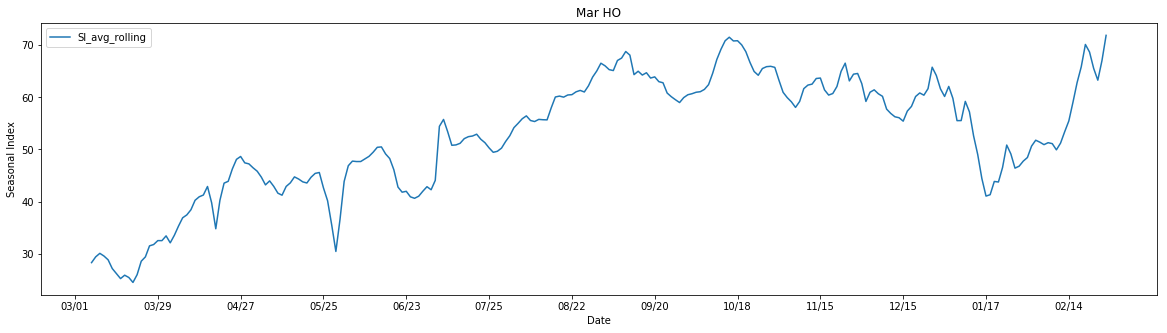

In [14]:

count=0
path = os.getcwd()

start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
start_day=raw_input('Please input start day of seasonal period in DD format: ')
            
end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
i=int(raw_input('Please input 1 if seasonal period crosses year and 0 if not: '))
            

listing = os.listdir(path)
for infile in listing:
    temp=pd.read_excel(infile) #read each file into panda dataframe
    
    contract_yr_str=infile[-8:-4] # get the contract year
    
    seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
    seasonal_year=str(seasonal_year) # convert to string
    
    start_date=seasonal_year+'-'+start_mth+'-'+start_day # create start date
    end_date=str(int(seasonal_year)+i)+'-'+end_mth+'-'+end_day # create end date
    
    temp=temp[temp['Date']>=start_date] # filter for start date
    #temp.reset_index(inplace=True)
    temp=temp[temp['Date']<=end_date] # filter for end date
    
    #temp=temp.iloc[0:250]

    upper=temp['Settle'].max() # get max value
    lower=temp['Settle'].min() # get min value
    
    temp['SI']=((temp['Settle']-lower)/(upper-lower))*100 # create seasonal index column
    temp=temp.set_index('Date') # creating new index as Date

    temp=temp.reset_index() # putting date back out into col
    temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d')
    temp=temp.set_index('Date')
    temp=pd.DataFrame(temp['SI'],columns=['SI'])
    

    #combine into seasonal index table
    
    if count==0:
        Seasonal_Combi=temp
        seasonal_year=str(int(seasonal_year)+1)
        Seasonal_Combi.columns=[seasonal_year]
        
        count+=1
        
    else:
        
        seasonal_year=str(int(seasonal_year)+1)
        Seasonal_Combi[seasonal_year]=temp['SI']


      
#row-wise average    
Seasonal_Combi['SI_avg']=Seasonal_Combi.mean(axis=1)

#normalize the seasonal index

upper_sc=Seasonal_Combi['SI_avg'].max()
lower_sc=Seasonal_Combi['SI_avg'].min()
Seasonal_Combi['SI_avg_normalized']=((Seasonal_Combi['SI_avg']-lower_sc)/(upper_sc-lower_sc))*100
Seasonal_Combi['SI_avg_rolling']=Seasonal_Combi['SI_avg_normalized'].rolling(5).mean() #take a 5-day rolling average to smmooth this out

#plot on line chart
ax=Seasonal_Combi.plot.line(x=Seasonal_Combi.index, y='SI_avg_rolling',figsize=(20,5),xticks=[x for x in range(0,250,10)],title=month+" "+product)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonal Index')
ax.legend(loc=2)


In [15]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\HO


In [16]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [17]:
cd ..

C:\Users\boonsin.teo\Documents
